## Training data using decision tree classifier and visualizing the results

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("Iris (1).csv")

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
import numpy as np
x=data.drop(["Species","Id"],axis=1)

In [6]:
data.Species[data.Species=="Iris-virginica"]=0
data.Species[data.Species=="Iris-versicolor"]=1
data.Species[data.Species=="Iris-setosa"]=2
data


c:\users\phogat\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\phogat\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\phogat\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0
146,147,6.3,2.5,5.0,1.9,0
147,148,6.5,3.0,5.2,2.0,0
148,149,6.2,3.4,5.4,2.3,0


In [7]:
y=data.Species
y=pd.to_numeric(y)
y


0      2
1      2
2      2
3      2
4      2
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 150, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',splitter='best')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0,
       2, 1, 2, 2, 1, 2], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.98

In [11]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.98

In [12]:
final_report=pd.DataFrame(y_pred,columns=["y_pred"])
final_report=pd.concat([final_report.reset_index(drop=True),x_test.reset_index(drop=True)],axis=1)
final_report.head()

,y_pred,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,2,5.5,4.2,1.4,0.2
1,1,6.3,3.3,4.7,1.6
2,0,7.3,2.9,6.3,1.8
3,1,5.8,2.7,4.1,1.0
4,2,5.0,3.4,1.5,0.2


c:\users\phogat\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:86: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  **kwargs)


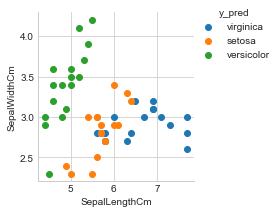

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid") 
  
sns.FacetGrid(final_report, hue ="y_pred").map(plt.scatter,  
                              'SepalLengthCm',  
                              'SepalWidthCm').add_legend(labels=["virginica","setosa","versicolor"]) 